In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

import pandas as pd
from scipy.sparse import csr_matrix

plt.rcParams['font.size'] = 10
#plt.rcParams['font.family'] = 'Times New Roman'

In [10]:
def extractVars(mat):
    var0 = np.empty([2366, 30])
    var1 = np.empty([2366, 30])
    var2 = np.empty([2366, 30])
    for var, index in zip(range(0, 7098, 3), range(0,2366)):
        assert len(list(range(0, 7098, 3))) == len(list(range(0,2366)))

        var0[index, :] = mat[var, :]
        var1[index, :] = mat[var + 1, :]
        var2[index, :] = mat[var + 2, :]
        result = [var0, var1, var2];
    return [var0, var1, var2]

def plotV1trends_new(rows, cols, start, varIndex):
    assert varIndex < 3 and varIndex >= 0, "Variable number out of range (we have only 3 variables for this case)"
    numFigs = rows*cols
    fig = plt.figure(figsize=(15,15), dpi=100)
    
    # Initializing variables
    files = []
    
    for i in range(1, numFigs + 1):
        fileCounter = start+i - 1
        files.append("SolnChangeMat" + str(fileCounter) +'.m')
        mat = readMatlabMat(files[i-1])
        
        # extract variables
        variable = extractVars(mat.todense())

        # do SVD
        [U, S, Vt] = np.linalg.svd(variable[varIndex])
        
        # do the plotting
        ax = fig.add_subplot(rows,cols, i)
        ax.plot(Vt[0].T)
        ax.set_title("iter: " + str(fileCounter))
        ax.grid(linestyle= '--')
    plt.tight_layout()

In [3]:
def readMatlabMat(sFileName):
    data = pd.read_csv(sFileName, sep=' ', skiprows=6, skipfooter=2, names=['i', 'j', 'remove_this', 'value'], engine='python')
    data.drop(columns= ['remove_this'], inplace= True)
    # renumbering array indices to make MATLAB format compatible to Python's
    data['i'] += -1
    data['j'] += -1
    # get the number of rows
    num_rows = max(data['i']) + 1
    num_cols = max(data['j']) + 1
    # Creating a sparse matrix
    A = csr_matrix((data['value'], (data['i'], data['j'])), shape= (num_rows, num_cols))
    return A

def plotVrows():
    fig = plt.figure(figsize=(15, 4), dpi=100)

    rows = 1
    cols = 3

    for i in range(1, 4):
        ax = fig.add_subplot(rows, cols, i)
        labelName = 'row ' + str(i) + ' of Vt'
        ax.plot(Vt[i-1].T, label= labelName)
        ax.legend()
        ax.grid(linestyle= '--')

In [4]:
def plotV1trend(rows, cols, start):
    numFigs = rows*cols
    fig = plt.figure(figsize=(15,15), dpi=100)
    
    files = []

    for i in range(1, numFigs + 1):
        fileCounter = start+i - 1
        files.append("SolnChangeMat" + str(fileCounter) +'.m')
        mat = readMatlabMat(files[i-1])
        [U, S, Vt] = np.linalg.svd(mat.todense())
        
        ax = fig.add_subplot(rows,cols, i)
        ax.plot(Vt[0].T)
        ax.set_title("iter: " + str(fileCounter))
        ax.grid(linestyle= '--')

In [5]:
def read_mpibaij(file):
    lines = file.read().splitlines()
    assert 'Mat Object:' in lines[0]
    assert lines[1] == '  type: mpibaij'
    for line in lines[2:]:
        parts = line.split(': ')
        assert len(parts) == 2
        assert parts[0].startswith('row ')

        row_index = int(parts[0][4:])
        row_contents = eval(parts[1].replace(')  (', '), ('))

        # Here you have the row_index and a tuple of (column_index, value)
        # pairs that specify the non-zero contents. You could process this
        # depending on your needs, e.g. store the values in an array.
        for (col_index, value) in row_contents:
            #print('row %d, col %d: %s' % (row_index, col_index, value))
            # TODO: Implement real code here.
            # You probably want to do something like:
            JacMat[row_index][col_index] = value


In [6]:
def plotV1trends_BE(rows, cols, start, varIndex):
    assert varIndex < 3 and varIndex >= 0, "Variable number out of range (we have only 3 variables for this case)"
    numFigs = rows*cols
    fig = plt.figure(figsize=(15,15), dpi=100)
    
    # Initializing variables
    files = []
    
    for i in range(1, numFigs + 1):
        fileCounter = start+i - 1
        files.append("./BE_constantDt/SolnChangeMat" + str(fileCounter) +'.m')
        mat = readMatlabMat(files[i-1])
        
        # extract variables
        variable = extractVars(mat.todense())

        # do SVD
        [U, S, Vt] = np.linalg.svd(variable[varIndex])
        
        # do the plotting
        ax = fig.add_subplot(rows,cols, i)
        ax.plot(Vt[0].T)
        ax.set_title("iter: " + str(fileCounter))
        ax.grid(linestyle= '--')
    plt.tight_layout()

# Residual plots of Newtonian2D

#### All convergence plots has oscillation, some come up earlier, some of them later

Text(0.5, 1.0, 'Krylov - local timestepping')

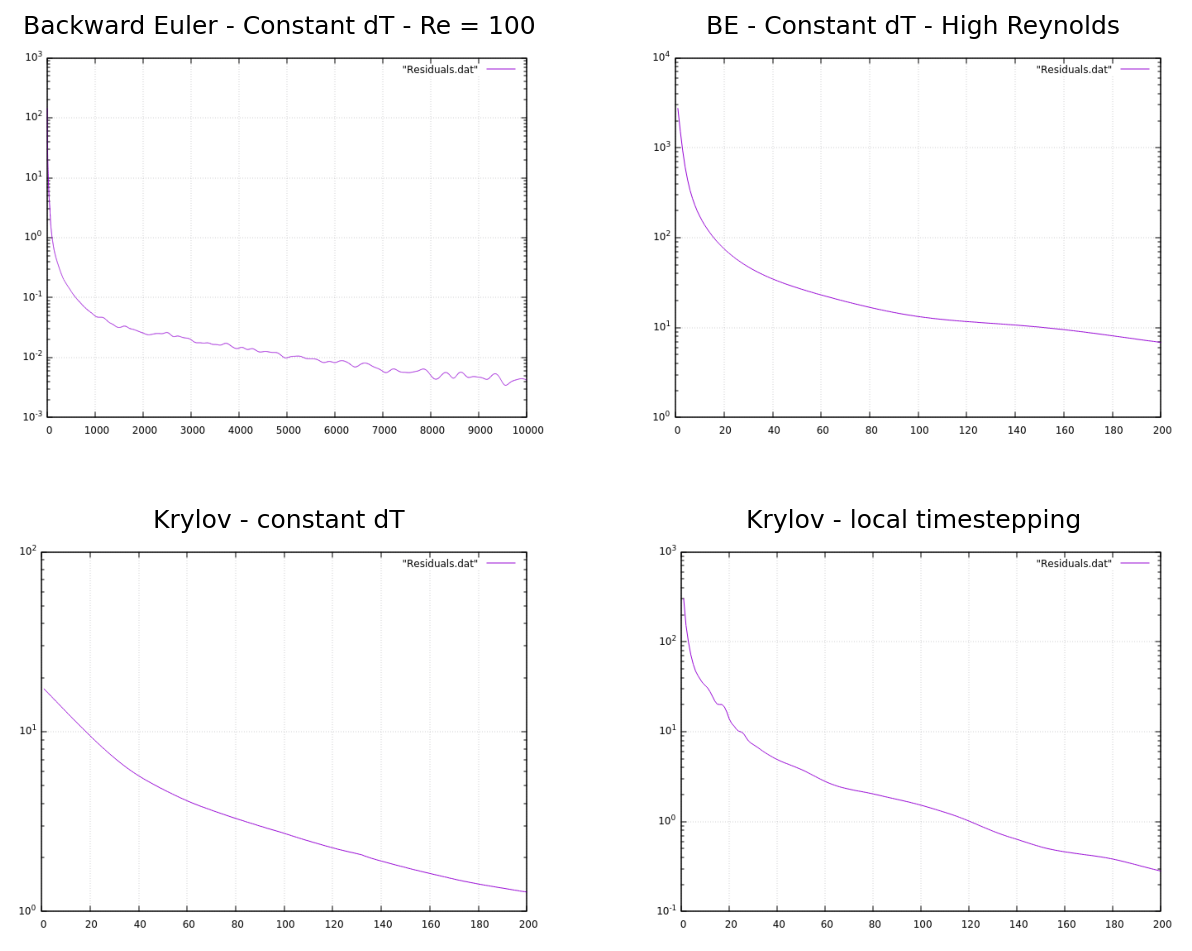

In [2]:
fig = plt.figure(figsize=(10, 8), dpi=150)

rows = 2
cols = 2

fig.add_subplot(rows, cols, 1)
image1 = mpimg.imread('Oscillatory_Convergence_constantDT_BE_lowRe.png')
plt.imshow(image1)
plt.axis('off')
plt.title('Backward Euler - Constant dT - Re = 100')

fig.add_subplot(rows, cols, 2)
image2 = mpimg.imread('BE_constantDT_HighRe.png')
plt.imshow(image2)
plt.axis('off')
plt.title('BE - Constant dT - High Reynolds')

fig.add_subplot(rows, cols, 3)
image3 = mpimg.imread('Krylov_constantDT.png')
plt.imshow(image3)
plt.axis('off')
plt.title('Krylov - constant dT')

fig.add_subplot(rows, cols, 4)
image4 = mpimg.imread('Krylov_localTimestepping.png')
plt.imshow(image4)
plt.axis('off')
plt.title('Krylov - local timestepping')


In [4]:
JacMat = np.empty([7098, 7098])
with open('JacobianMatrix.csv', 'rt', encoding='ascii') as file:
        read_mpibaij(file)
JacMat.shape

(7098, 7098)

In [5]:
JacMat

array([[    0.   ,   158.187,  -160.6  , ...,     0.   ,     0.   ,
            0.   ],
       [ -102.395, -1296.77 ,   389.402, ...,     0.   ,     0.   ,
            0.   ],
       [  113.609,   389.406, -1309.92 , ...,     0.   ,     0.   ,
            0.   ],
       ...,
       [    0.   ,     0.   ,     0.   , ...,     0.   ,  -160.6  ,
          158.187],
       [    0.   ,     0.   ,     0.   , ...,   113.609, -1368.77 ,
          280.66 ],
       [    0.   ,     0.   ,     0.   , ...,  -102.395,   355.635,
        -1276.31 ]])

In [6]:
[w, vr] = np.linalg.eig(JacMat)
w.shape

(7098,)

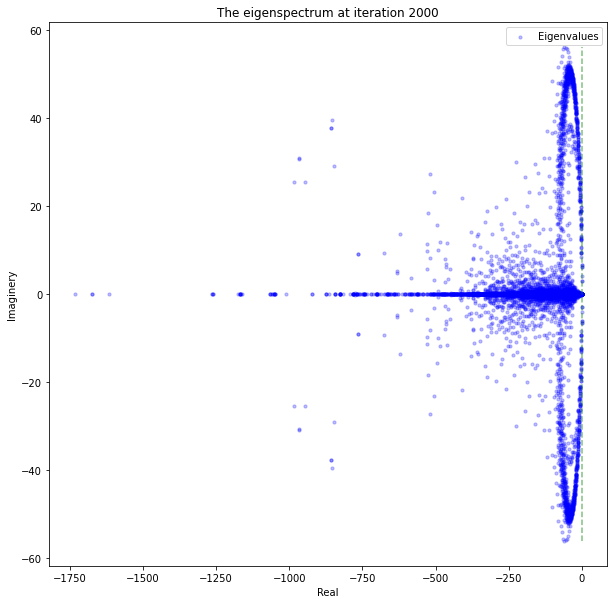

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(np.real(w), np.imag(w), alpha= 0.25, color= 'b', s=10, label = 'Eigenvalues')
plt.plot([0,0], [-np.max(np.imag(w)), np.max(np.imag(w))], '--g', alpha = 0.5)
plt.xlabel('Real')
plt.ylabel('Imaginery')
plt.legend()
plt.title('The eigenspectrum at iteration 2000')
plt.show()

In [8]:
w_sorted = sorted(w, reverse=True)

### The first few of the eigenvalues:

In [9]:
df = pd.DataFrame({"Real": np.real(w_sorted), "Imag": np.imag(w_sorted)})
print(df.head(5))

           Real      Imag
0  3.998080e-11  0.000000
1 -2.489386e-01  3.022434
2 -2.489386e-01 -3.022434
3 -2.541264e-01  3.007505
4 -2.541264e-01 -3.007505


In [10]:
JacMat500 = np.empty([7098, 7098])
with open('JacobianMatrix.csv', 'rt', encoding='ascii') as file:
        jacMat500 = read_mpibaij(file)
JacMat500.shape

(7098, 7098)

In [ ]:
[w2, vr2] = np.linalg.eig(JacMat)
w2.shape

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(np.real(w2), np.imag(w2), alpha= 0.25, color= 'b', s=10, label = 'Eigenvalues')
plt.plot([0,0], [-np.max(np.imag(w2)), np.max(np.imag(w2))], '--g', alpha = 0.5)
plt.xlabel('Real')
plt.ylabel('Imaginery')
plt.legend()
plt.title('The eigenspectrum at iteration 500')
plt.show()

In [ ]:
w_sorted2 = sorted(w2, reverse=True)
df2 = pd.DataFrame({"Real": np.real(w_sorted2), "Imag": np.imag(w_sorted2)})
print(df2.head(5))

* No special trends here
<hr>

## Looking at rows of V
For oscillatory convergence, we look at the first few rows of V\
do PCA at cycles\
NOTE: this is for the high Reynolds, Krylov solver, dt = 0.11

## Reconstructing the oscillatory convergence with Krylov constant time stepping - Re = 100

(-0.5, 639.5, 479.5, -0.5)

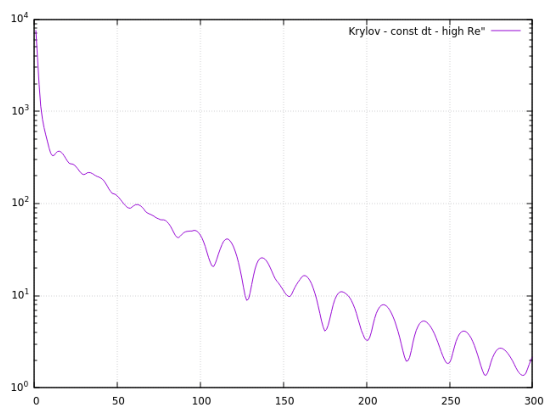

In [8]:
imageKrylovHighConst = mpimg.imread('resplot_krylov_highRe_constantdt.png')
plt.figure(figsize=(10,10), dpi=70)
plt.imshow(imageKrylovHighConst)
plt.axis('off')

Plotting the first 3 rows

In [ ]:
PCA175 = readMatlabMat('SolnChangeMat175.m')
[U, S, Vt] = np.linalg.svd(PCA175.todense())
plotVrows()

In [ ]:
PCA272 = readMatlabMat('SolnChangeMat272.m')
[U, S, Vt] = np.linalg.svd(PCA272.todense())
plotVrows()

In [ ]:
plotV1trend(3, 3, 265)
plt.tight_layout()

In [ ]:
plotV1trend(3, 3, 273)
plt.tight_layout()

In [ ]:
plotV1trend(3, 3, 100)
plt.tight_layout()

In [ ]:
plotV1trends_new(3, 3, 100, varIndex= 2)

In [ ]:
plotV1trends_new(3,3, 265, 1)

## Plotting 1st row of V for Backward Euler 

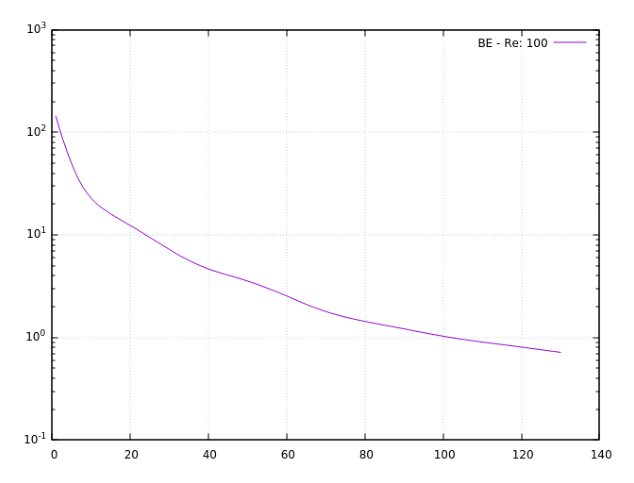

In [12]:
resplot = mpimg.imread('./BE_constantDt/BE_re100_smalliter.png')
figure = plt.figure(dpi=150)
plt.imshow(resplot)
plt.axis('off')
plt.show()

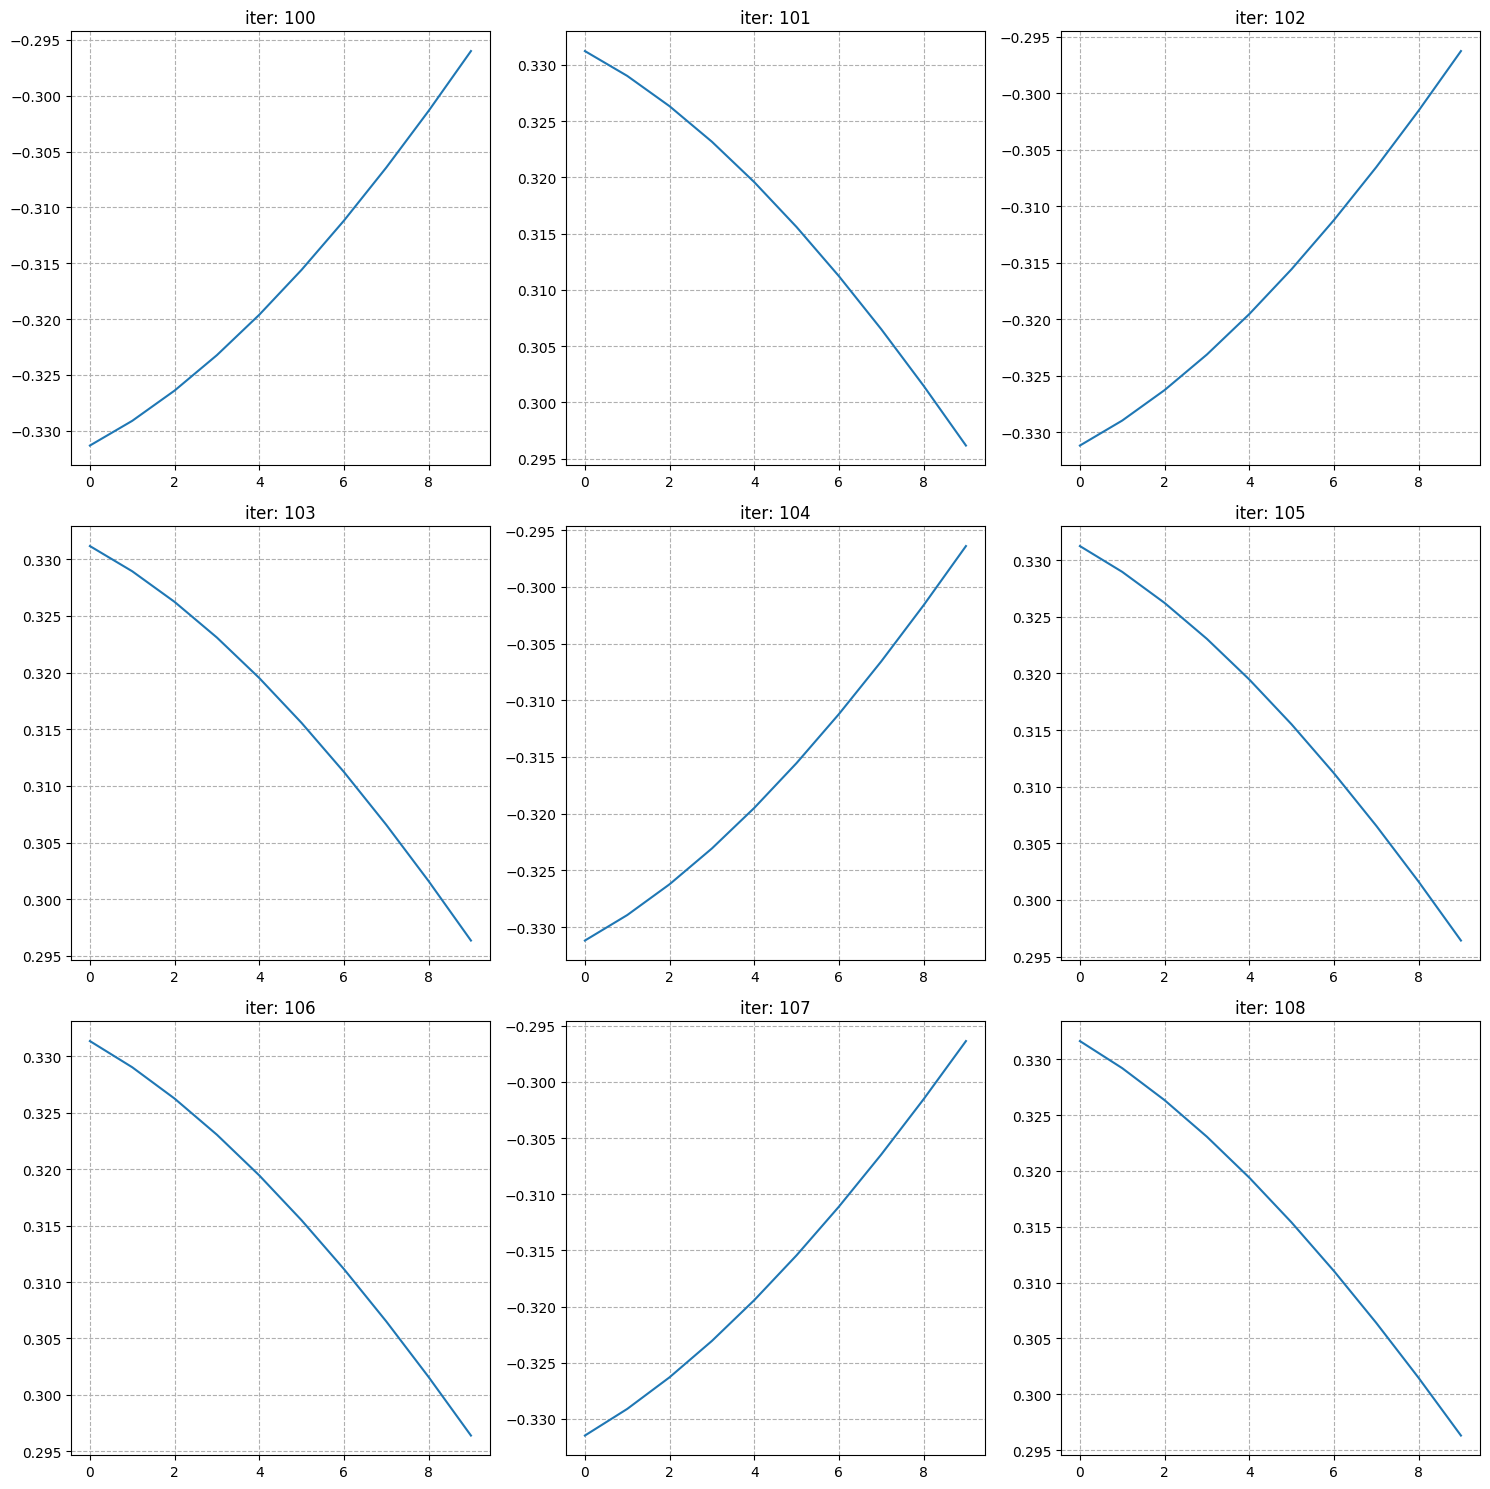

In [14]:
plotV1trends_BE(3,3, 100, 0)
plt.savefig('signFlip_Vrows.png')

In this case, although it seems log-linear, only Var1 is log-linear\
the other Vars are oscillatory

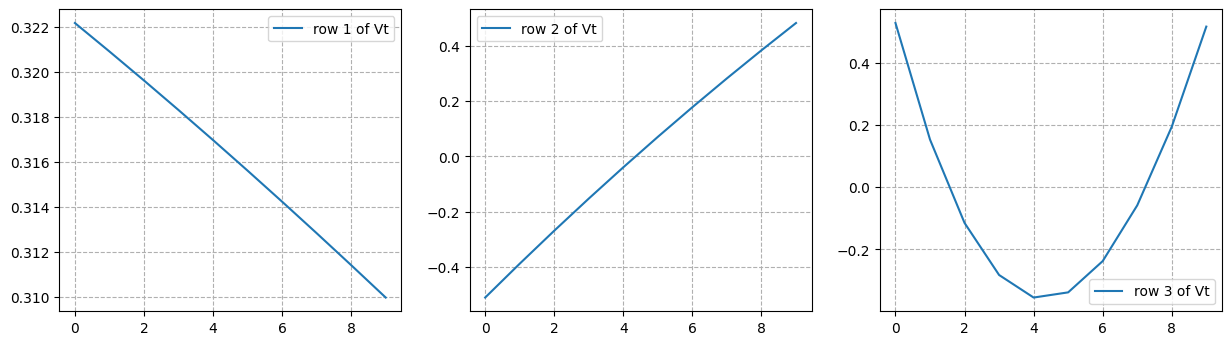

In [16]:
PCA400 = readMatlabMat('SolnChangeMat400.m')
[var0, var1, var2] = extractVars(PCA400.todense())
[U, S, Vt] = np.linalg.svd(var0)
plotVrows()

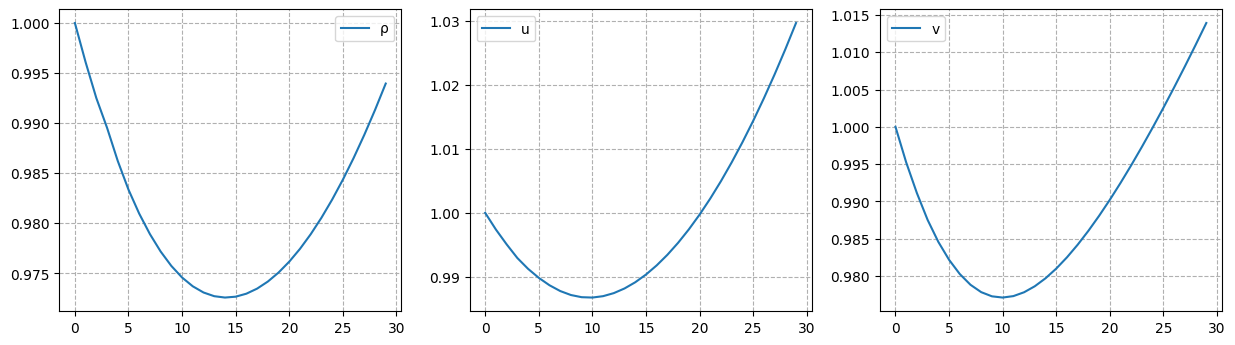

In [11]:
PCA200 = readMatlabMat('./BE_constantDt/SolnChangeMat200.m')
[rho, u, v] = extractVars(PCA200.todense())
[U0, S0, Vt0] = np.linalg.svd(rho)
[U1, S1, Vt1] = np.linalg.svd(u)
[U2, S2, Vt2] = np.linalg.svd(v)

fig = plt.figure(figsize=(15, 4), dpi=100)

rows = 1
cols = 3

ax = fig.add_subplot(rows, cols, 1)
ax.plot(Vt0[0].T/Vt0[0,0], label= '\u03C1')
ax.legend()
ax.grid(linestyle= '--')

ax = fig.add_subplot(rows, cols, 2)
ax.plot(Vt1[0].T/Vt1[0,0], label= 'u')
ax.legend()
ax.grid(linestyle= '--')

ax = fig.add_subplot(rows, cols, 3)
ax.plot(Vt2[0].T/Vt2[0,0], label= 'v')
ax.legend()
ax.grid(linestyle= '--')
plt.savefig("Newton2D_residualofVars.png")

In [9]:
np.save("data", Vt2[0])

In [15]:
Vt2[0].tofile('yk.csv', sep=',')

In [14]:
Vt2

array([[ 0.3146615 ,  0.31669901,  0.31805079,  0.31874255,  0.31880341,
         0.3182655 ,  0.3171634 ,  0.31553376,  0.31341481,  0.31084594],
       [-0.50575355, -0.38967113, -0.27366345, -0.15847857, -0.04481712,
         0.06667011,  0.17538411,  0.28077903,  0.38236309,  0.47969903],
       [ 0.53489064,  0.15754183, -0.11301453, -0.2818818 , -0.35457878,
        -0.33696955, -0.23519546, -0.05560942,  0.19528697,  0.51090316],
       [-0.44184211,  0.17616656,  0.38491311,  0.31598609,  0.09400765,
        -0.1641939 , -0.35028179, -0.36498099, -0.11852423,  0.46902245],
       [-0.32641429,  0.42488465,  0.29881555, -0.08776975, -0.35025813,
        -0.31917277, -0.02185213,  0.33680669,  0.39426921, -0.34930787],
       [-0.20633084,  0.5021204 , -0.06619306, -0.40027741, -0.18491693,
         0.24320678,  0.38373255,  0.00239114, -0.4992432 ,  0.22551094],
       [-0.11003586,  0.41832441, -0.40949975, -0.20391472,  0.33526148,
         0.28467581, -0.263016  , -0.36523567